In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
sns.set(font_scale = 1, style = 'whitegrid')

In [2]:
#load df
allPresenters = pd.read_pickle("Files/Dataframes/Presenters.pkl") #read df for all authors(before API)
authors_API = pd.read_pickle("Files/Dataframes/Authors_afterAPI.pkl") #read df for all authors after API
authorsAPI_realNames = pd.read_pickle("Files/Dataframes/apiAuthors_realNames.pkl") #read df for authors after API, where rows with "." in first name is removed
authors_wGender = pd.read_pickle("Files/Dataframes/authors_wGender.pkl") #read df for all authors with gender
divisions = pd.read_pickle("Files/Dataframes/Divisions.pkl") #read division df

In [3]:
authors_wGender[authors_wGender.AuthorCount >= 2000000]

,FileID,OriginalName,API_Name,MaxPaperCount,Field,FirstPaperYear,AuthorCount,Year,Name,Institution,Title,Division,SessionType,SessionIndex,FirstName,Seniority,CumulativePaperCount,Productivity,Gender
654559,93615,M,Marion M. Bradford,65866,Physics,2012.0,4227786,2020,M,Unknown,Temperature-Dependent Spectroscopy of Rutile T...,DCMP,presenter,59060.0,Marion,8.0,24805,3100.625,F


In [4]:
#only authors within physics
physic_authors = authors_wGender[authors_wGender.Field == 'Physics']
divisions_physics = divisions[divisions.Field == 'Physics']

In [5]:
print("Number of authors within all fields:", len(authors_wGender))
print("Number of authors within physics", len(physic_authors))

Number of authors within all fields: 1467456
Number of authors within physics 1457833


In [6]:
#unique authors
len(physic_authors.Name.unique())

155730

In [7]:
nWebscrape = len(allPresenters)
nAPI = len(authors_API)
nAPI_realNames = len(authorsAPI_realNames)
nAuthors_wGender = len(authors_wGender)

In [8]:
data = [nWebscrape, nAPI, nAPI_realNames, nAuthors_wGender, len(physic_authors)]

In [9]:
dataCount = pd.DataFrame(data).rename(columns = {0: 'n'})

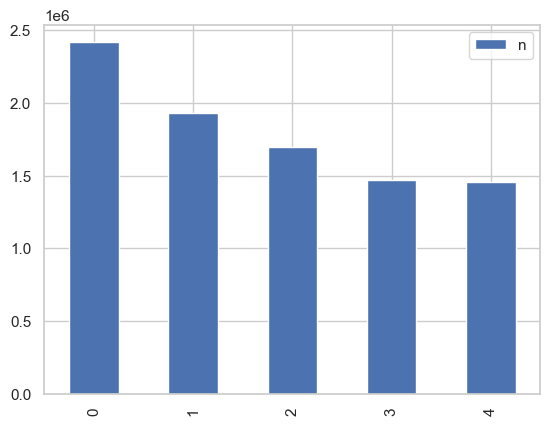

In [10]:
dataCount.plot(kind='bar')
plt.show()

#save fig, don't show legend, edit names for ticks
#0: after webscraping
#1: after API
#2: after API, cleaned names
#3: after adding gender
#4: authors within physics

In [11]:
print("Highest number of results for a author:", physic_authors.AuthorCount.max())

Highest number of results for a author: 4227786


In [12]:
physic_authors['log_AuthorCount'] = np.log2(physic_authors.AuthorCount)
physic_authors['log_MaxPaperCount'] = np.log2(physic_authors.MaxPaperCount)
physic_authors['log_CumulativePaperCount'] = np.log2(physic_authors.CumulativePaperCount)
physic_authors['log_Productivity'] = np.log2(physic_authors.Productivity)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


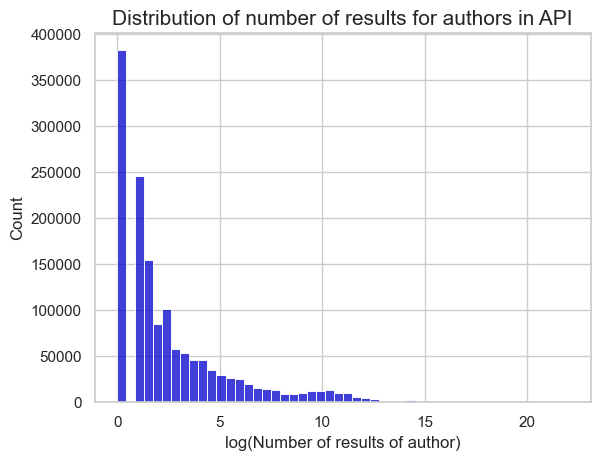

In [13]:
sns.histplot(physic_authors, x = 'log_AuthorCount', color = 'mediumblue', bins = 50)
plt.xlabel("log(Number of results of author)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of number of results for authors in API", fontsize = 15)
plt.savefig("Figures/API_results.png", bbox_inches='tight')
plt.show()

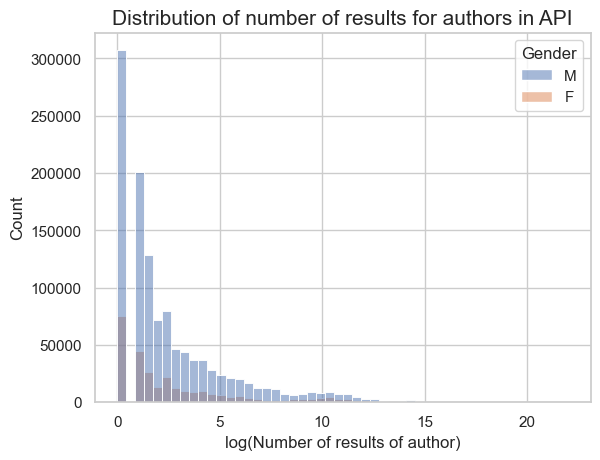

In [14]:
sns.histplot(physic_authors, x = 'log_AuthorCount', hue = 'Gender', bins = 50)
plt.xlabel("log(Number of results of author)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of number of results for authors in API", fontsize = 15)
plt.show()

In [15]:
#create df with invited and non-invited speakers
invitedSpeakers = physic_authors[physic_authors.SessionType == 'invited']
participants = physic_authors[physic_authors.SessionType != 'invited']

In [16]:
#table with count of number of invited Speakers/authors of presented abstracts
invitedTable = invitedSpeakers.groupby(['Year']).count().reset_index()
participantsTable = participants.groupby(['Year']).count().reset_index()

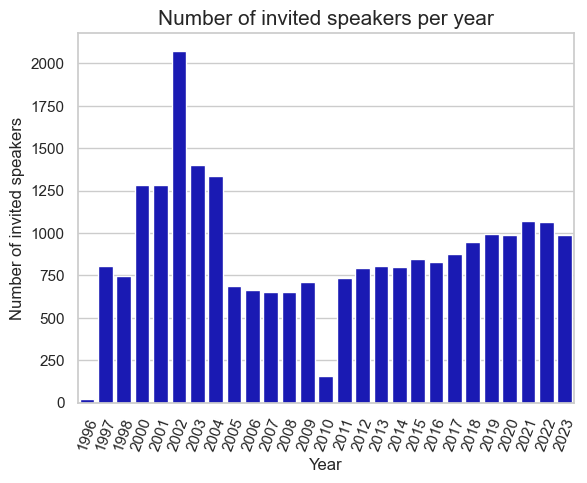

In [17]:
sns.barplot(data = invitedTable, x='Year', y='Name', color = 'mediumblue')
plt.xticks(rotation=70)
plt.ylabel("Number of invited speakers", fontsize=12)
plt.title("Number of invited speakers per year", fontsize = 15)
plt.savefig("Figures/invitedSpeakers.png", bbox_inches='tight')
plt.show()

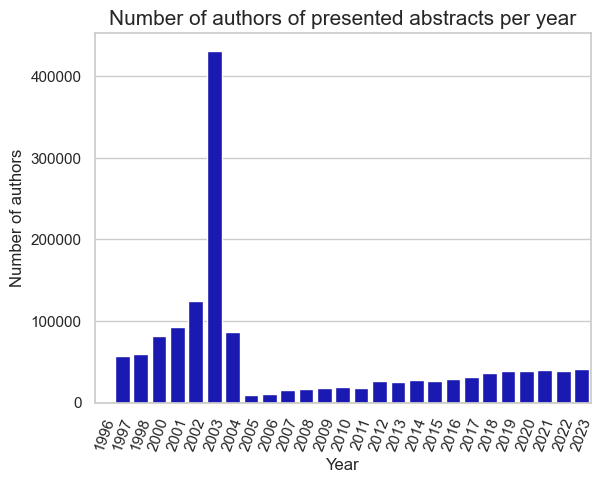

In [18]:
sns.barplot(data = participantsTable, x='Year', y='Name', color = 'mediumblue')
plt.xticks(rotation=70)
plt.ylabel("Number of authors", fontsize=12)
plt.title("Number of authors of presented abstracts per year", fontsize = 15)
plt.savefig("Figures/presenters.png", bbox_inches='tight')
plt.show()

#### Now do gender stacked plot

In [19]:
#calculate gender ratio
genderRatio_invited = pd.crosstab(index=invitedSpeakers.Year,
                             columns=invitedSpeakers.Gender,
                             normalize="index")

genderRatio_participants = pd.crosstab(index=participants.Year,
                             columns=participants.Gender,
                             normalize="index")

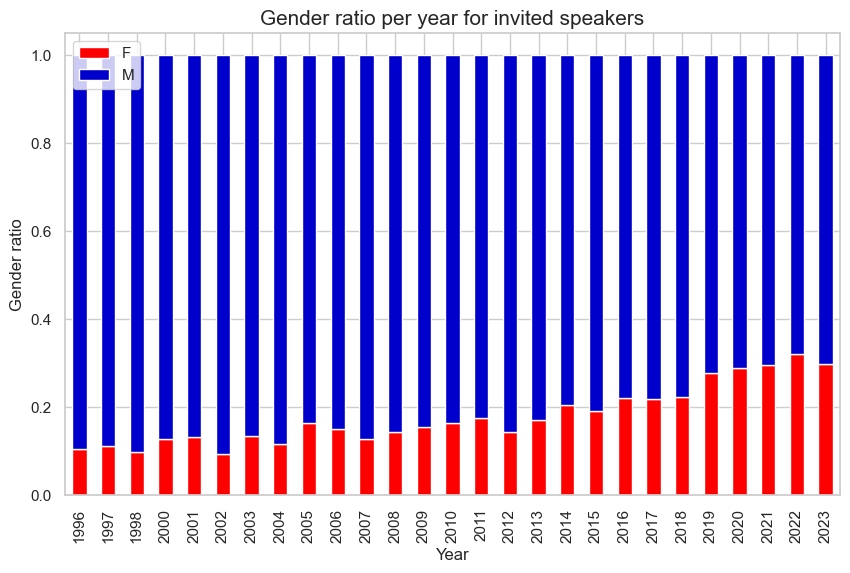

In [20]:
genderRatio_invited.plot(kind='bar', 
                    stacked=True,
                         color = ['Red', "mediumblue"],
                    figsize=(10, 6))
plt.legend(loc="upper left", ncol=1)
plt.title("Gender ratio per year for invited speakers", fontsize = 15)
plt.xlabel("Year")
plt.ylabel("Gender ratio")
plt.savefig("Figures/genderRatio_invited.png", bbox_inches='tight')
plt.show()

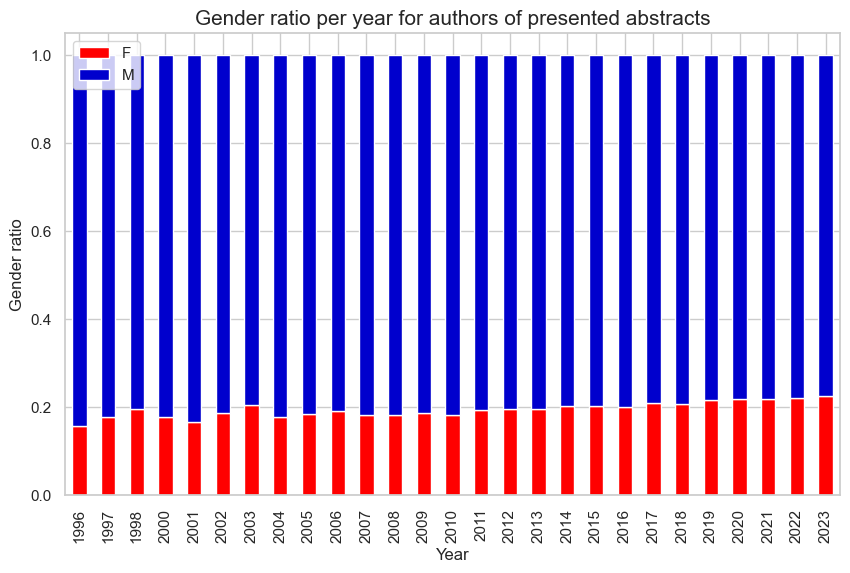

In [21]:
genderRatio_participants.plot(kind='bar', 
                    stacked=True,
                         color = ['Red', "mediumblue"],
                    figsize=(10, 6))


plt.legend(loc="upper left", ncol=1)
plt.title("Gender ratio per year for authors of presented abstracts", fontsize = 15)
plt.xlabel("Year")
plt.ylabel("Gender ratio")
plt.savefig("Figures/genderRatio_participants.png", bbox_inches='tight')
plt.show()

In [22]:
invitedSpeakers_genderCount = invitedSpeakers.groupby(['Year', 'Gender']).count().reset_index()
participants_genderCount = participants.groupby(['Year', 'Gender']).count().reset_index()

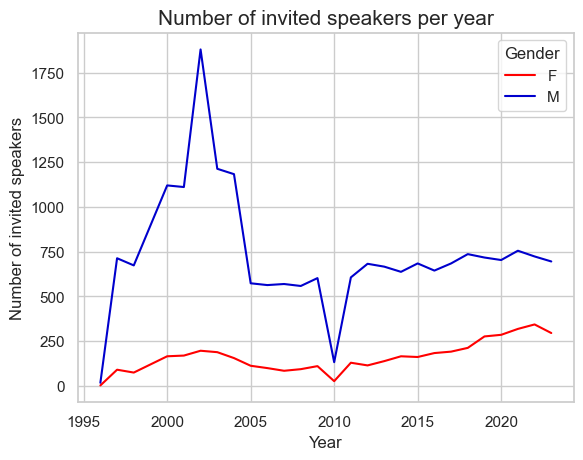

In [23]:
sns.lineplot(data = invitedSpeakers_genderCount, x = 'Year', y = 'Name', hue = 'Gender',  palette=['Red', 'mediumblue'])
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of invited speakers", fontsize=12)
plt.title("Number of invited speakers per year", fontsize = 15)
plt.savefig("Figures/nInvitedSpeakers.png", bbox_inches='tight')
plt.show()

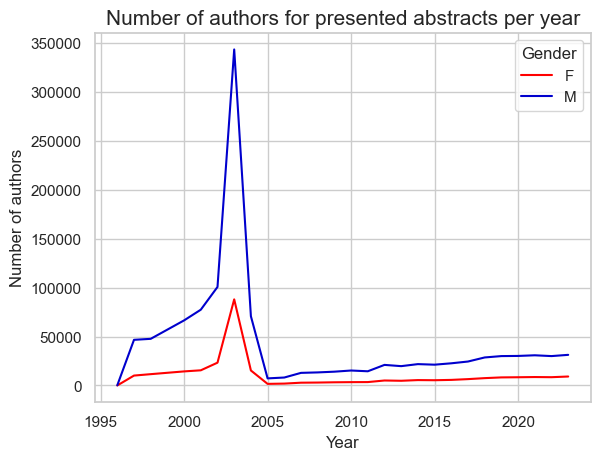

In [24]:
sns.lineplot(data = participants_genderCount, x = 'Year', y = 'Name', hue = 'Gender',  palette=["Red", "mediumblue"])
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of authors", fontsize=12)
plt.title("Number of authors for presented abstracts per year", fontsize = 15)
plt.savefig("Figures/nParticipants.png", bbox_inches='tight')
plt.show()

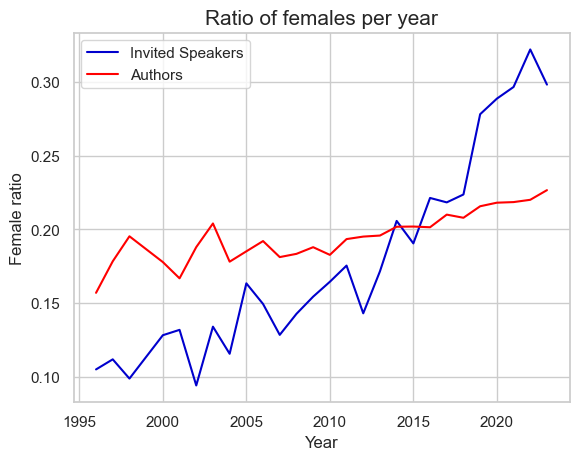

In [25]:
sns.lineplot(data = genderRatio_invited.reset_index(), x = 'Year', y = 'F', color = 'mediumblue', label = 'Invited Speakers')
sns.lineplot(data = genderRatio_participants.reset_index(), x = 'Year', y = 'F', color = 'Red', label = 'Authors')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Female ratio", fontsize=12)
plt.title("Ratio of females per year", fontsize = 15)
plt.savefig("Figures/FemaleRatio.png", bbox_inches='tight')
plt.show()

In [26]:
#only authors with exactly one author count
authors1 = physic_authors[physic_authors.AuthorCount == 1]

In [27]:
#only authors with exactly one author count
invitedSpeakers1 = invitedSpeakers[invitedSpeakers.AuthorCount == 1]
participants1 = participants[participants.AuthorCount == 1]

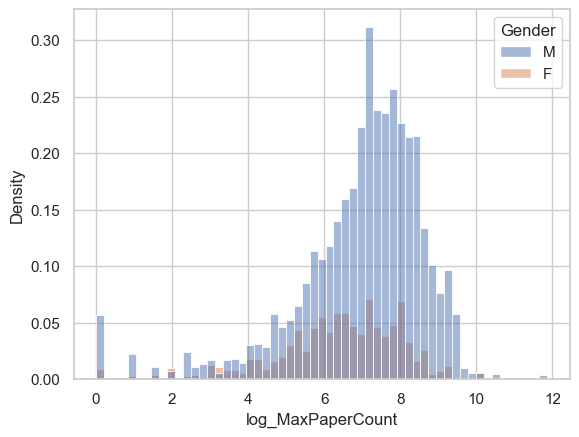

In [28]:
#hist of max papercount
sns.histplot(data = invitedSpeakers1, x = 'log_MaxPaperCount', hue = 'Gender', color = ['mediumblue', 'red'], stat = 'density')
plt.show()

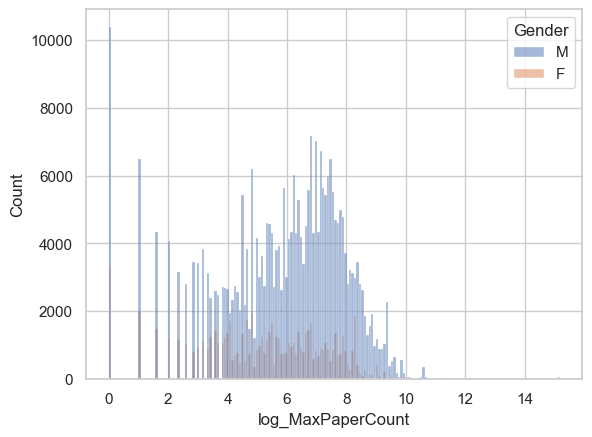

In [29]:
#hist of max papercount
sns.histplot(data = participants1, x = 'log_MaxPaperCount', hue = 'Gender', color = ['mediumblue', 'red'] )
plt.show()

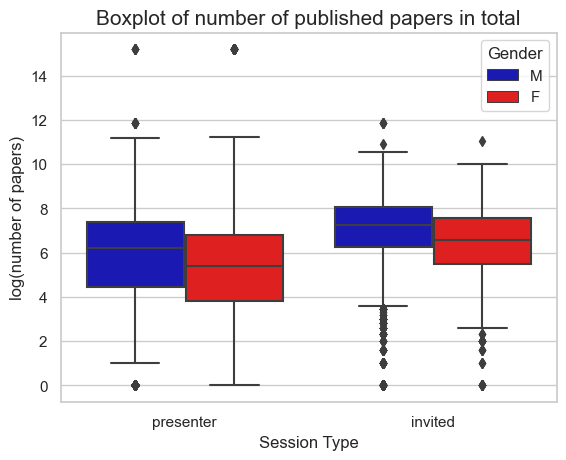

In [30]:
#boxplot of maxPaperCount
sns.boxplot(data=authors1, x="SessionType", y="log_MaxPaperCount", hue='Gender', palette = ['mediumblue', 'red'])
plt.xlabel("Session Type", fontsize=12)
plt.ylabel("log(number of papers)", fontsize=12)
plt.title("Boxplot of number of published papers in total", fontsize = 15)
plt.savefig("Figures/maxPaperCount_boxplot", bbox_inches='tight')
plt.show()

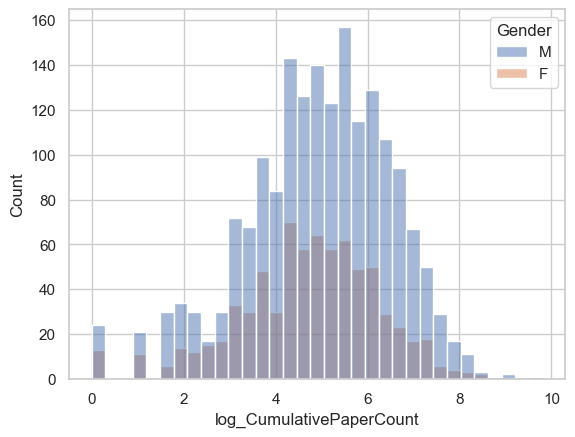

In [31]:
#hist of log(cumualtivePaperCount)
sns.histplot(data = invitedSpeakers1, x = 'log_CumulativePaperCount', color = 'mediumblue', hue = 'Gender')
plt.show()

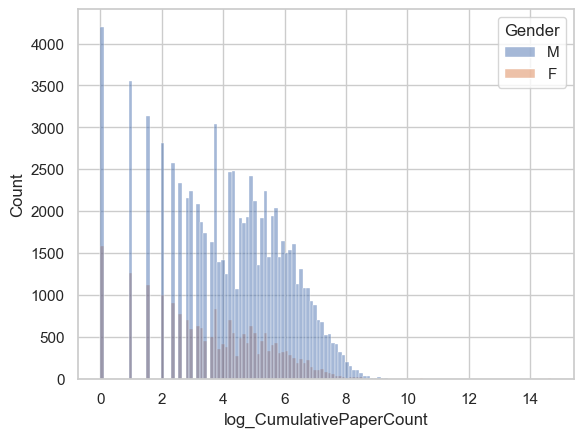

In [32]:
#hist of log(cumualtivePaperCount)
sns.histplot(data = participants1, x = 'log_CumulativePaperCount', color = 'mediumblue', hue = 'Gender')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


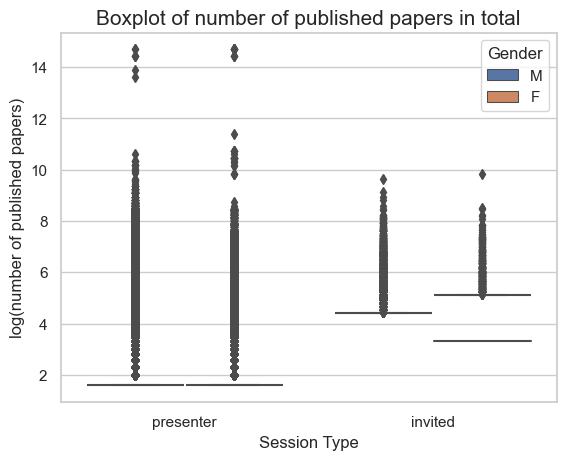

In [33]:
#boxplot of maxPaperCount
sns.boxplot(data=authors1, x="SessionType", y="log_CumulativePaperCount", hue='Gender')
plt.xlabel("Session Type", fontsize=12)
plt.ylabel("log(number of published papers)", fontsize=12)
plt.title("Boxplot of number of published papers in total", fontsize = 15)
plt.savefig("Figures/cumualtivePaperCount_boxplot", bbox_inches='tight')
plt.show()

In [34]:
#find only researchers with positive seniority
positiveSeniority = authors1[authors1.Seniority >= 0]

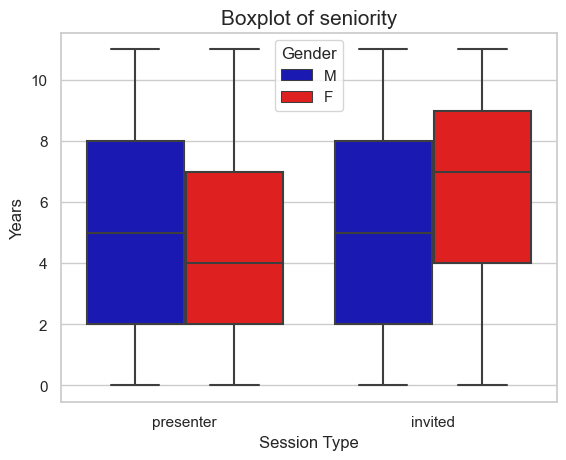

In [35]:
#boxplot of seniority
sns.boxplot(data=positiveSeniority , x="SessionType", y="Seniority", hue='Gender', palette = ['mediumblue', 'red'])
plt.xlabel("Session Type", fontsize=12)
plt.ylabel("Years", fontsize=12)
plt.title("Boxplot of seniority", fontsize = 15)
plt.savefig("Figures/seniority_boxplot", bbox_inches='tight')
plt.show()

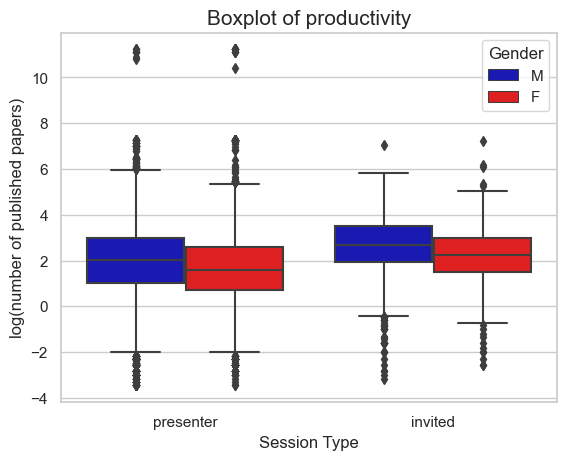

In [36]:
sns.boxplot(data=positiveSeniority , x="SessionType", y="log_Productivity", hue='Gender', palette = ['mediumblue', 'red'])
plt.xlabel("Session Type", fontsize=12)
plt.ylabel("log(number of published papers)", fontsize=12)
plt.title("Boxplot of productivity", fontsize = 15)
plt.savefig("Figures/productivity_boxplot", bbox_inches='tight')
plt.show()

In [37]:
division_physics_invited = divisions_physics[divisions_physics.SessionType == 'invited']
division_physics_participants = divisions_physics[divisions_physics.SessionType != 'invited']

In [38]:
#calculate ratio for divisions for invited and presenters
#DMP_invited_ratio = getRatio(DMP_invited, 'DMP')
#DCMP_invited_ratio = getRatio(DCMP_invited, 'DCMP')
#DPOLY_invited_ratio = getRatio(DPOLY_invited, 'DPOLY')
#GMAG_invited_ratio = getRatio(GMAG_invited, 'GMAG')
#FIAP_invited_ratio = getRatio(FIAP_invited, 'FIAP')

#DMP_participants_ratio = getRatio(DMP_participants, 'DMP')
#DCMP_participants_ratio = getRatio(DCMP_participants, 'DCMP')
#DPOLY_participants_ratio = getRatio(DPOLY_participants, 'DPOLY')
#GMAG_participants_ratio = getRatio(GMAG_participants, 'GMAG')
#FIAP_participants_ratio = getRatio(FIAP_participants, 'FIAP')

In [39]:
#merge df
#division_invited = pd.concat([DMP_invited_ratio, DCMP_invited_ratio, DPOLY_invited_ratio, GMAG_invited_ratio, FIAP_invited_ratio])
#.set_index('Division')
#division_participants = pd.concat([DMP_participants_ratio, DCMP_participants_ratio, DPOLY_participants_ratio, GMAG_participants_ratio, FIAP_participants_ratio])

In [40]:
divGenderRatio_invited = pd.crosstab(index=division_physics_invited.Division,
                             columns=division_physics_invited .Gender,
                             normalize="index")

divGenderRatio_participants = pd.crosstab(index=division_physics_participants.Division,
                             columns=division_physics_participants .Gender,
                             normalize="index")

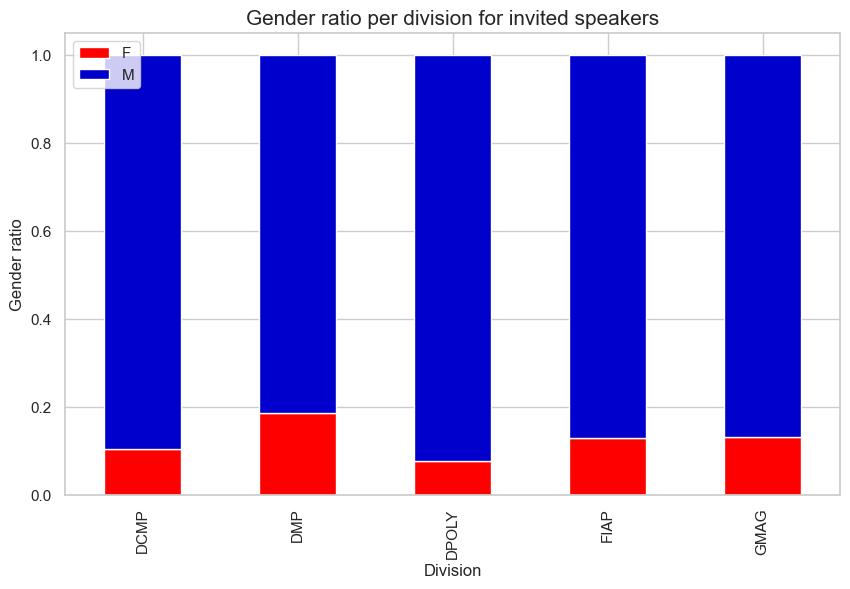

In [43]:
divGenderRatio_invited.plot(kind='bar', 
                    stacked=True,
                         color = ['Red', "mediumblue"],
                    figsize=(10, 6))
plt.legend(loc="upper left", ncol=1)
plt.title("Gender ratio per division for invited speakers", fontsize = 15)
plt.xlabel("Division")
plt.ylabel("Gender ratio")
plt.savefig("Figures/genderRatio_divisionInvited.png", bbox_inches='tight')
plt.show()

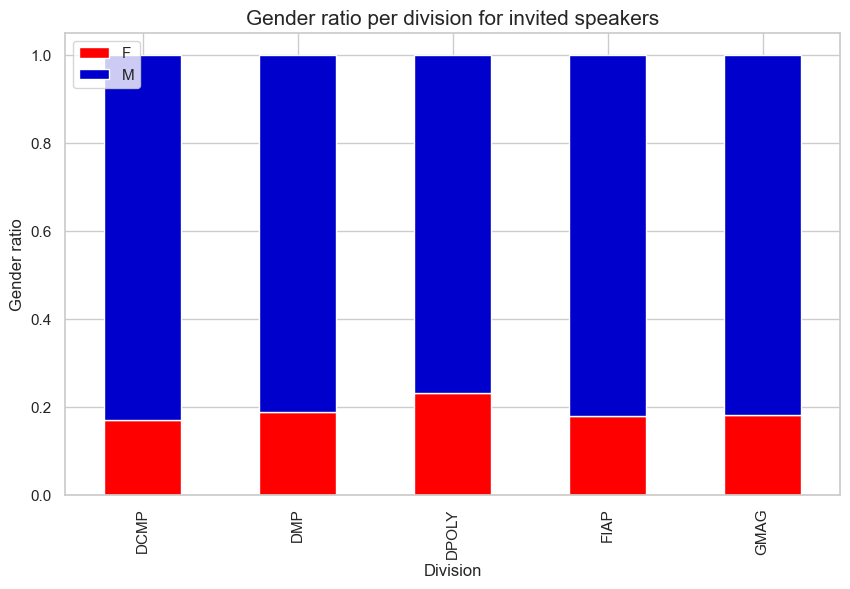

In [44]:
divGenderRatio_participants.plot(kind='bar', 
                    stacked=True,
                         color = ['Red', "mediumblue"],
                    figsize=(10, 6))
plt.legend(loc="upper left", ncol=1)
plt.title("Gender ratio per division for invited speakers", fontsize = 15)
plt.xlabel("Division")
plt.ylabel("Gender ratio")
plt.savefig("Figures/genderRatio_divisionParticipants.png", bbox_inches='tight')
plt.show()